I used two datasets. In one dataset, I performed activities such as in assignment 4 and in the second dataset, additional activities.

# Amazon Earphones Reviews Dataset 
# **About Dataset**

**Context**

This dataset consists of a 14337 Amazon reviews, star ratings, for 10 latest (as of mid-2019) bluetooth earphone devices for learning how to train Machine for sentiment analysis.

**What you can do with this Data?**

You can use this data to analyze what customers saying about Bluetooth earphone devices; discover insights into consumer reviews and assist with machine learning models. You can also train your machine models for aspect level sentiment analysis.

**Source**

Extracted from Amazon's website

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

import io
from google.colab import files
import csv

uploaded = files.upload()
earphones_df = pd.read_csv(io.StringIO(uploaded['AllProductReviews.csv'].decode('utf-8')))

#earphones_df = pd.read_csv('AllProductReviews.csv')
earphones_df.head(20)

Saving AllProductReviews.csv to AllProductReviews.csv


,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255
5,Charging port not working\n,"After 11 days, the charging port isn't working...",1,boAt Rockerz 255
6,Loved the color and sound !!\n,Sound-4.5/5Build quality-4.5/5Battery life -4/...,4,boAt Rockerz 255
7,Great sound with worst mic.\n,After one month usage reviewing this .Pros-1- ...,3,boAt Rockerz 255
8,Battery life is good enough to keep going all ...,I can’t get enough of this earphone! The bass ...,5,boAt Rockerz 255
9,Very very bad Durabity\n,The product durability is 1 month..I just lost...,1,boAt Rockerz 255


In [7]:
earphones_df.shape

(14337, 4)

In [8]:
earphones_df.isnull().sum().sum()

0

Conclusions: The dataset doesn't contain any nulls.

In [10]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

earphones_df['ReviewBody'] = earphones_df['ReviewBody'].apply(lambda x: remove_punctuation(x))
earphones_df["ReviewBody"]

0        No doubt it has a great bass and to a great ex...
1        This  earphones are unreliable i bought it bef...
2        i bought itfor 999I purchased it second time g...
3        Its sound quality is adorable overall it was g...
4        Its Awesome Good sound quality  89 hrs battery...
                               ...                        
14332                                               Good\n
14333                An amazing product but a bit costly\n
14334                                              Sound\n
14335    the sound is good battery life is good but the...
14336    M writing this review after using for almost 7...
Name: ReviewBody, Length: 14337, dtype: object

In [12]:
earphones_df['ReviewBody'] = earphones_df['ReviewBody'].str.replace('\n','')
earphones_df["ReviewBody"]

0        No doubt it has a great bass and to a great ex...
1        This  earphones are unreliable i bought it bef...
2        i bought itfor 999I purchased it second time g...
3        Its sound quality is adorable overall it was g...
4        Its Awesome Good sound quality  89 hrs battery...
                               ...                        
14332                                                 Good
14333                  An amazing product but a bit costly
14334                                                Sound
14335    the sound is good battery life is good but the...
14336    M writing this review after using for almost 7...
Name: ReviewBody, Length: 14337, dtype: object

In [13]:
earphones_df['ReviewTitle'] = earphones_df['ReviewTitle'].apply(lambda x: remove_punctuation(x))
earphones_df['ReviewTitle'] = earphones_df['ReviewTitle'].str.replace('\n','')
earphones_df["ReviewTitle"]

0                Honest review of an edm music lover
1                Unreliable earphones with high cost
2                            Really good and durable
3                    stopped working in just 14 days
4        Just Awesome Wireless Headphone under 1000😉
                            ...                     
14332                                           Good
14333                                Amazing Product
14334                                        Not bad
14335                                 a good product
14336           Average headphones  n overrated name
Name: ReviewTitle, Length: 14337, dtype: object

In [14]:
import re
earphones_df['ReviewTitle'] = earphones_df['ReviewTitle'].str.replace('[^A-Za-z0-9]', ' ', flags=re.UNICODE)
earphones_df["ReviewTitle"]

<ipython-input-14-1706de7a3ca2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  earphones_df['ReviewTitle'] = earphones_df['ReviewTitle'].str.replace('[^A-Za-z0-9]', ' ', flags=re.UNICODE)


0                Honest review of an edm music lover
1                Unreliable earphones with high cost
2                            Really good and durable
3                    stopped working in just 14 days
4        Just Awesome Wireless Headphone under 1000 
                            ...                     
14332                                           Good
14333                                Amazing Product
14334                                        Not bad
14335                                 a good product
14336           Average headphones  n overrated name
Name: ReviewTitle, Length: 14337, dtype: object

Conclusions: Emojis and punctuation have been removed in both columns.

In [11]:
earphones_df['ReviewStar'].size

14337

In [15]:
earphones_df = earphones_df[earphones_df.ReviewStar != 3]
#short test:
sum(earphones_df["ReviewStar"] == 3)

0

Conclusions: Rows with rating equals 3 have been removed as they are neutral.

In [16]:
earphones_df['ReviewStar'].size

12834

In [17]:
earphones_df['ReviewStar'].loc[earphones_df['ReviewStar'] <= 2, ] = -1
earphones_df['ReviewStar'].loc[earphones_df['ReviewStar'] >= 4] = 1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Conclusions: Ratings with value equal or less than 2 were replaced by -1 value and ratings with value equal or more than 4 were replaced by 1 value.

In [18]:
earphones_df.head(20)

,ReviewTitle,ReviewBody,ReviewStar,Product
1,Unreliable earphones with high cost,This earphones are unreliable i bought it bef...,-1,boAt Rockerz 255
2,Really good and durable,i bought itfor 999I purchased it second time g...,1,boAt Rockerz 255
3,stopped working in just 14 days,Its sound quality is adorable overall it was g...,-1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000,Its Awesome Good sound quality 89 hrs battery...,1,boAt Rockerz 255
5,Charging port not working,After 11 days the charging port isnt working a...,-1,boAt Rockerz 255
6,Loved the color and sound,Sound455Build quality455Battery life 45Earphon...,1,boAt Rockerz 255
8,Battery life is good enough to keep going all day,I can’t get enough of this earphone The bass i...,1,boAt Rockerz 255
9,Very very bad Durabity,The product durability is 1 monthI just lost m...,-1,boAt Rockerz 255
10,Running has become comfortable now,The sound quality is good I mean it can’t be c...,1,boAt Rockerz 255
11,Disappointed,What on earth is the use of buying such produc...,-1,boAt Rockerz 255


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

from sklearn.model_selection import train_test_split
train, test = train_test_split(earphones_df, test_size=0.3)

Conclusions: The dataset was divided into two training and testing datasets.

In [20]:
X_train_ReviewBody = vectorizer.fit_transform(train['ReviewBody'])

X_test_ReviewBody = vectorizer.transform(test['ReviewBody'])

In [21]:
model = LogisticRegression()
model.fit(X_train_ReviewBody, train['ReviewStar'])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
coef = np.argsort(model.coef_[0])
names = vectorizer.get_feature_names()

print("Top 10 negative words: ")
for i in range(10):
  print(names[coef[i]])
print()

print("Top 10 positive words: ")
for i in range(1, 11, 1):
  print(names[coef[-i]])

Top 10 negative words: 
worst
stopped
poor
not
bad
pathetic
waste
sucks
doesn
cheap

Top 10 positive words: 
awesome
best
nice
excellent
perfect
port
superb
amazing
love
super


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Conclusions: We found top 10 negative and positive words in 'ReviewBody' column.

In [23]:
model.predict(X_test_ReviewBody)

array([ 1,  1, -1, ...,  1,  1,  1])

In [24]:
prob_results = model.predict_proba(X_test_ReviewBody)
prob_results

array([[1.28596610e-02, 9.87140339e-01],
       [7.64073875e-02, 9.23592612e-01],
       [9.99595158e-01, 4.04842065e-04],
       ...,
       [2.09833233e-05, 9.99979017e-01],
       [1.15819588e-03, 9.98841804e-01],
       [7.74062924e-02, 9.22593708e-01]])

In [25]:
positive = np.argsort(prob_results[:, 0])
negative = np.argsort(prob_results[:, 1])

print("Positive reviews: ")
print(test['ReviewBody'].iloc[positive[0]])
print(test['ReviewBody'].iloc[positive[1]])
print(test['ReviewBody'].iloc[positive[2]])
print(test['ReviewBody'].iloc[positive[3]])
print(test['ReviewBody'].iloc[positive[4]])

print()

print("Negative reviews: ")
print(test['ReviewBody'].iloc[negative[0]])
print(test['ReviewBody'].iloc[negative[1]])
print(test['ReviewBody'].iloc[negative[2]])
print(test['ReviewBody'].iloc[negative[3]])
print(test['ReviewBody'].iloc[negative[4]])

Positive reviews: 
Build Well designed lightweight and comfortable The wires are good and not flimsy wearing comfort is well maintained better than Mi bluetooth earphones the main competitor of boAt in the 1499 price categoryComfort As mentioned above these earphones are really comfortable fits in the ear with no chance of slipping out unless youre trying desperately and internationally Theyre lightweight so no hazard on that department Perfect for long hours of music playbackSound The most important aspect of an earphone is the sound clarity and boAt surely doesnt disappoint here as well A bit base heavy but the sound is clear crisp and loud Good noise cancellation also helps to isolate the music playback Although judging from a pure audiophiles point of view the Mi bluetooth earphones might have a more balanced sound signature but boAt being a bit base heavy is just awesome for hiphops or Bollywood genres A music player with a good equalizer preferably Poweramp for android is going t

Conclusions: We found top five most positive and most negative reviews.

In [26]:
model.score(X_test_ReviewBody, test['ReviewStar'])

0.8953518566606077

Cocnlusions: The accuracy of our predictions is close to 90%, which is quite a good result.

## With significant words

In [28]:
significant_words = ['love','great','pretty','old','little','perfect','loves','well','able','nice','broke','less','even','waste','disappointed','work','product','money','would','earphone', 'quality', 'sound']

Conclusions: I added some dataset related words like 'sound', 'quality', 'earphone'.

In [29]:
vectorizer_significant_words = CountVectorizer(vocabulary=significant_words)

X_train_words = vectorizer_significant_words.fit_transform(train['ReviewBody'])
X_test_words = vectorizer_significant_words.transform(test['ReviewBody'])

model_significant_words = LogisticRegression()

model_significant_words.fit(X_train_words, train['ReviewStar'])

LogisticRegression()

In [30]:
coef = np.argsort(model_significant_words.coef_[0])
names = vectorizer_significant_words.get_feature_names()

print("Top 10 negative words: ")
for i in range(10):
  print(names[coef[i]])
print()

print("Top 10 positive words: ")
for i in range(1, 11, 1):
  print(names[coef[-i]])

Top 10 negative words: 
waste
disappointed
even
able
broke
work
old
less
product
earphone

Top 10 positive words: 
perfect
nice
love
little
great
pretty
well
loves
sound
money


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
model_significant_words.predict(X_test_words)

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
prob_results_words = model_significant_words.predict_proba(X_test_words)
prob_results_words

array([[0.2124878 , 0.7875122 ],
       [0.08778613, 0.91221387],
       [0.36450483, 0.63549517],
       ...,
       [0.26373472, 0.73626528],
       [0.23617953, 0.76382047],
       [0.30170072, 0.69829928]])

In [33]:
positive_words = np.argsort(prob_results_words[:, 0])
negative_words = np.argsort(prob_results_words[:, 1])
print("Positive reviews: ")
print(test['ReviewBody'].iloc[positive_words[0]])
print(test['ReviewBody'].iloc[positive_words[1]])
print(test['ReviewBody'].iloc[positive_words[2]])
print(test['ReviewBody'].iloc[positive_words[3]])
print(test['ReviewBody'].iloc[positive_words[4]])

print()

print("Negative reviews: ")
print(test['ReviewBody'].iloc[negative_words[0]])
print(test['ReviewBody'].iloc[negative_words[1]])
print(test['ReviewBody'].iloc[negative_words[2]])
print(test['ReviewBody'].iloc[negative_words[3]])
print(test['ReviewBody'].iloc[negative_words[4]])

Positive reviews: 
Sennheiser are known for their great studio grade sound quality with a flat EQ and this pair is no different I really love the sound quality of these headphones it is full with equal emphasis on the lows mids and highs without any artificial bass boosting You get a flat sound which makes this pair really versatile It is great for movie watching and voice calls The mic is great Everyone I called using this pair said I sounded clear with no distortions Also these come with 2 years warranty which is very nice to haveNow lets get to the cons and as usual its the built quality The wires are thin and made up of flimsy looking rubber I have seen braided cables in headphones much cheaper than this I would have loved Sennheiser to at least give some quality materials because you have to really take care or else I feel the wires will break Also the mic button feels cheapOverall this is a great pair of headphones for anyone looking for rich and clear sound If you like bass some

In [34]:
model_significant_words.score(X_test_words, test['ReviewStar'])

0.7613606855362244

In [35]:
coef_list = model_significant_words.coef_[0]
names_list = vectorizer_significant_words.get_feature_names()

for i in range(len(names)):
  print('name: ' + str(names_list[i]) + ' -->  coef: ' + str(coef_list[i]))

name: love -->  coef: 2.062987782670682
name: great -->  coef: 1.5017587705803366
name: pretty -->  coef: 1.0419830200436782
name: old -->  coef: -0.5192789650982067
name: little -->  coef: 1.6188663127597196
name: perfect -->  coef: 2.6246273637520305
name: loves -->  coef: 0.5156907056458105
name: well -->  coef: 0.601770896099576
name: able -->  coef: -1.1300718505795893
name: nice -->  coef: 2.283187289703307
name: broke -->  coef: -1.0216026731864378
name: less -->  coef: -0.3433254677204469
name: even -->  coef: -1.173332417805815
name: waste -->  coef: -2.918045762787274
name: disappointed -->  coef: -1.770569644731878
name: work -->  coef: -0.6692278343539623
name: product -->  coef: -0.2833475394347661
name: money -->  coef: 0.22682434319583064
name: would -->  coef: 0.21367258207464998
name: earphone -->  coef: -0.24172170005801
name: quality -->  coef: 0.1362537472319162
name: sound -->  coef: 0.33452830344584106


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
print(model.score(X_test_ReviewBody, test['ReviewStar']))
print(model_significant_words.score(X_test_words, test['ReviewStar']))

print()


import time

start = time.time()
model_significant_words.fit(X_test_words, test['ReviewStar'])
end = time.time()
print("Time significant: " + str(end - start))

start = time.time()
model.fit(X_test_ReviewBody, test['ReviewStar'])
end = time.time()
print("Time ordinary: " + str(end - start))

0.8953518566606077
0.7613606855362244

Time significant: 0.04587912559509277
Time ordinary: 0.4714639186859131


Conclusions: As we can see accuracy of predictions is worse for significant words list, but time of evaluation is much smaller.

## I did the same steps or ReviewTitle column

In [37]:
vectorizer = CountVectorizer()

from sklearn.model_selection import train_test_split
train, test = train_test_split(earphones_df, test_size=0.3)

In [38]:
X_train_ReviewTitle = vectorizer.fit_transform(train['ReviewTitle'])

X_test_ReviewTitle = vectorizer.transform(test['ReviewTitle'])

In [39]:
model_ReviewTitle = LogisticRegression()
model_ReviewTitle.fit(X_train_ReviewTitle, train['ReviewStar'])

LogisticRegression()

In [40]:
coef = np.argsort(model_ReviewTitle.coef_[0])
names = vectorizer.get_feature_names()

print("Top 10 negative words: ")
for i in range(10):
  print(names[coef[i]])
print()

print("Top 10 positive words: ")
for i in range(1, 11, 1):
  print(names[coef[-i]])

Top 10 negative words: 
worst
not
waste
poor
dont
two
pathetic
disappointed
star
defective

Top 10 positive words: 
best
awesome
excellent
nice
great
five
superb
must
amazing
super


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
model_ReviewTitle.predict(X_test_ReviewTitle)

array([-1,  1,  1, ...,  1, -1,  1])

In [42]:
prob_results = model_ReviewTitle.predict_proba(X_test_ReviewTitle)
prob_results

array([[7.83789252e-01, 2.16210748e-01],
       [6.35416175e-02, 9.36458382e-01],
       [4.07386401e-02, 9.59261360e-01],
       ...,
       [2.59896720e-02, 9.74010328e-01],
       [9.99176071e-01, 8.23928833e-04],
       [1.91130424e-01, 8.08869576e-01]])

In [43]:
positive = np.argsort(prob_results[:, 0])
negative = np.argsort(prob_results[:, 1])

print("Positive reviews: ")
print(test['ReviewTitle'].iloc[positive[0]])
print(test['ReviewTitle'].iloc[positive[1]])
print(test['ReviewTitle'].iloc[positive[2]])
print(test['ReviewTitle'].iloc[positive[3]])
print(test['ReviewTitle'].iloc[positive[4]])

print()

print("Negative reviews: ")
print(test['ReviewTitle'].iloc[negative[0]])
print(test['ReviewTitle'].iloc[negative[1]])
print(test['ReviewTitle'].iloc[negative[2]])
print(test['ReviewTitle'].iloc[negative[3]])
print(test['ReviewTitle'].iloc[negative[4]])

Positive reviews: 
Best Best Best
This is best in 1600 and and best in all four measure
everything is best except sound that is fine but i expected more but fine
Good product and Excellent delivery  amazon  Can be value for money if pricing is a bit lesser 
CLEAR BASS GREAT SOUND QUALITY GREAT CABLE QUALITY GOOD MIC AMAZING NOISE 

Negative reviews: 
worst product  worst Customer Service dont buy
Worst worst worst product ever
Item was received  defective piece which was not working
Its not even 9 months not working now Not a good product
No Durability Will not last long Poor quality


Conclusions: Since the reviews are now shorter, it's easier to see that they represent the most positive and most negative content.

# Gender Classification Dataset

# **About Dataset**

**Context**

While I was practicing machine learning, I wanted to create a simple dataset that is closely aligned to the real world scenario and gives better results to whet my appetite on this domain. If you are a beginner who wants to try solving classification problems in machine learning and if you prefer achieving better results, try using this dataset in your projects which will be a great place to start.

**Content**

This dataset contains 7 features and a label column.

longhair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".

foreheadwidthcm - This column is in CM's. This is the width of the forehead.

foreheadheightcm - This is the height of the forehead and it's in Cm's.

nosewide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".

noselong - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".

lipsthin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".

distancenosetoliplong - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

gender - This is either "Male" or "Female".

In [44]:
gender2_df = pd.read_csv('gender_classification.csv')
gender2_df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [47]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
gender2_df['gender'] = le_gender.fit_transform(gender2_df.gender.values)
gender2_df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


Conclusions: I change the values: Male - 1, Female - 0.

In [49]:
from sklearn.model_selection import train_test_split
X = gender2_df.drop(['gender'],axis=1)
Y = gender2_df['gender']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

Conclusions: Dataset was divided into training and testing datasets, where based on the set X, we need to find the predictions of Y (gender).

## Decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [52]:
from sklearn import metrics

print("Accuracy of DecisionTreeClassifier:", metrics.accuracy_score(y_test, y_pred))

Accuracy of DecisionTreeClassifier: 0.9530469530469531


Conclusions: The accuracy of decision trees is about 95%, which is a very good result.

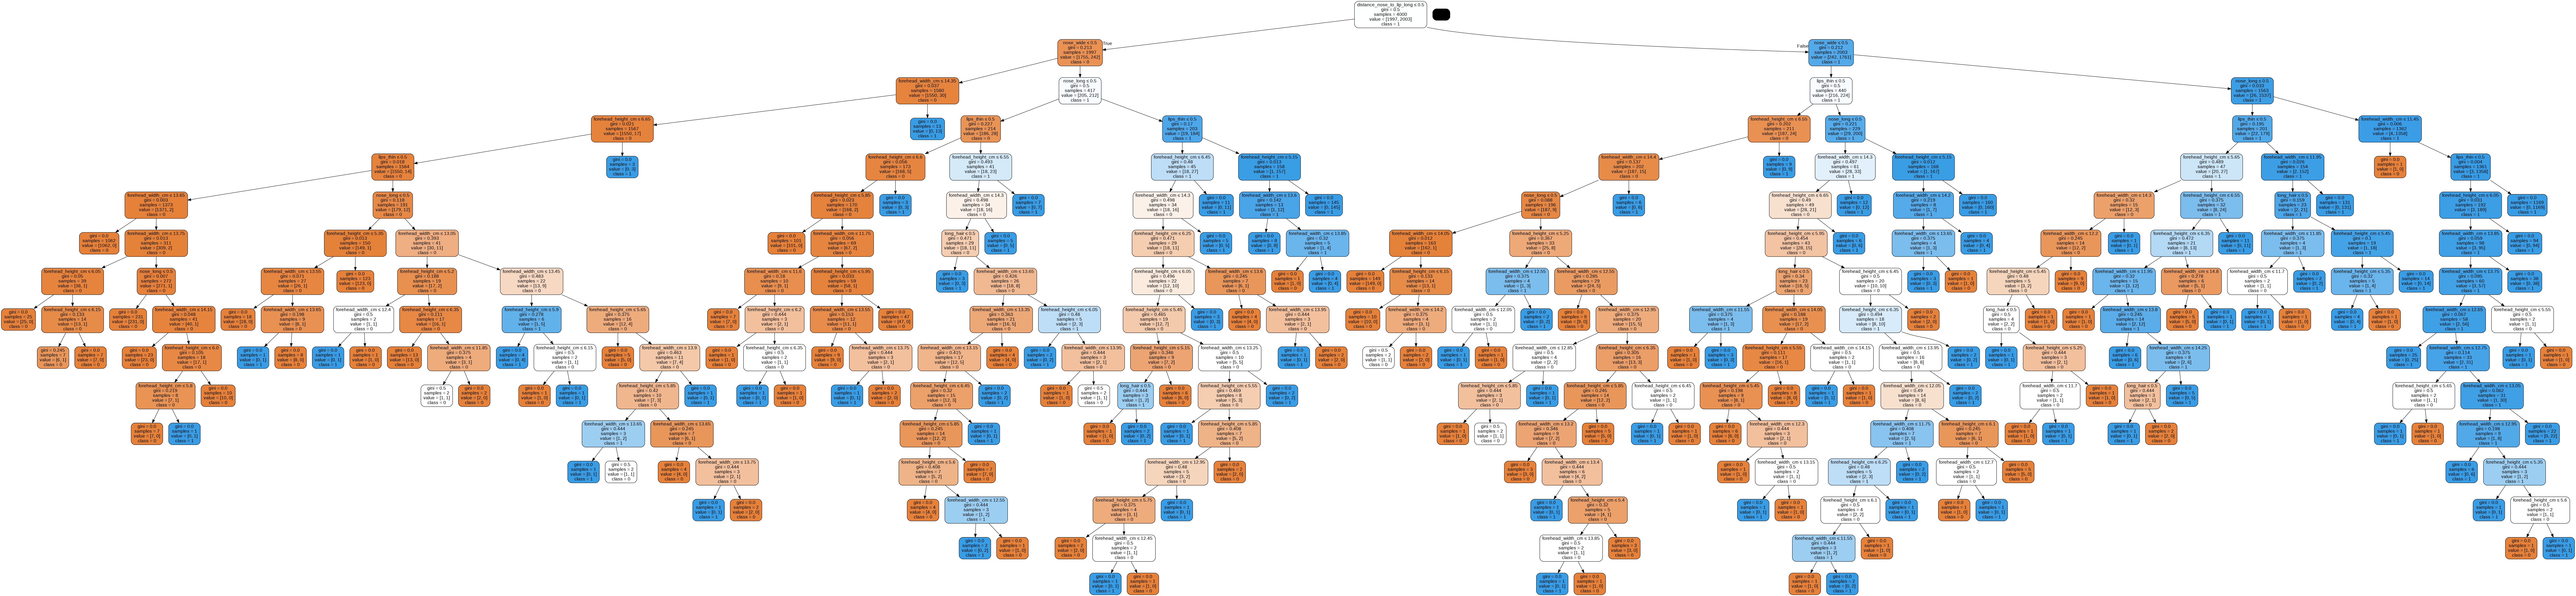

In [54]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = gender2_df.drop(['gender'],axis=1).columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision_Tree.png')
Image(graph.create_png())

Conclusions: Above we see a decision tree that analyzes possible cases based on our training set X to make predictions based on it.

In [73]:
test_pred = clf.predict(X_test)

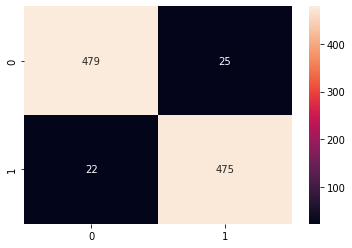

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

matrix = confusion_matrix(y_test, test_pred)
sns.heatmap(matrix, annot=True, fmt='d')

Conclusions: The confusion matrix helps to limit the accuracy of the classification method. It also shows that accuracy of this model is around 95%.

## Machine learning

Below is a classification method based on machine learning.
Using the feed forward network algorithm, we can obtain the classification of our problem at an advanced level, the quality of which will be based largely on the matching of the attributes of our network and, for example, the number of learning epochs.

In [58]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

import sklearn
import keras

from math import sqrt

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(7,)), # because we have 7 columns in our X set
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'), # sigmoid because type of our predictions is binary
])

In [64]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

gender_classification = model.fit(X_train, y_train, epochs=40, batch_size=50)

Epoch 1/40
80/80 [==============================] - 1s 2ms/step - loss: 0.6758 - accuracy: 0.6725
Epoch 2/40
80/80 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8898
Epoch 3/40
80/80 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.9205
Epoch 4/40
80/80 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.9350
Epoch 5/40
80/80 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9457
Epoch 6/40
80/80 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9517
Epoch 7/40
80/80 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9517
Epoch 8/40
80/80 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.9535
Epoch 9/40
80/80 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9535
Epoch 10/40
80/80 [==============================] - 0s 2ms/step - loss: 0.1309 - accuracy: 0.9525
Epoch 11/40
80/80 [

In [65]:
eval_results = model.evaluate(X_test, y_test, verbose=0) 
print("Loss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], eval_results[1]*100))

Loss, accuracy on test data: 
0.1079 95.10%


Conclusions: As we can see, also using the learning network algorithm, the accuracy of the model prediction is 95%.

In [67]:
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

32/32 [==============================] - 0s 3ms/step


In [69]:
auc_keras = auc(fpr_keras, tpr_keras)

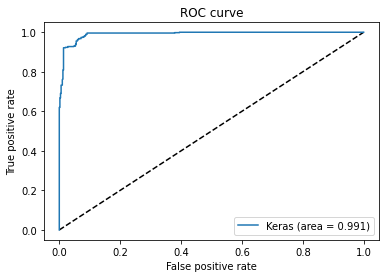

In [70]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Conclusions: The ROC curve shows how high the percentage of misclassifications (positive and negative) will be for a given cut-off point.